<a href="https://colab.research.google.com/github/NurJim/Machine-Learning/blob/main/Code_inmobiliaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA SET:  Inmobiliaria**


**por hacer**
- correlaciones -> falta interpretacion y ver cuales son las que correlan mas de 0.6
- graficas enfrentadas

## **Datos**

Los datos que aquí se van a tratar pueden encontrarse en:
https://www.kaggle.com/datasets/shivachandel/kc-house-data/code

La interpretación de las varibales puede ser encontrada en:
https://keepcoding.io/blog/metodos-de-filtrado-en-machine-learning/


## **Librerías**

Para llevar a cabo el análisis de los datos, necesitaremos las siguientes librerias:


In [1]:
# Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.stats import mstats
from scipy.stats import multivariate_normal

## **Exploración de datos**

Comenzamos importando los datos en forma de DataFrame.

In [2]:
data = pd.read_csv("Data_inmobiliaria.csv")

Vemos la dimensión de los datos.

In [3]:
data.shape

(21613, 21)

En este caso, tenemos un total de 21613 observaciones evaluadas en 21 variables.

Para hacernos una idea de los datos, vemos la cabecera de los mismo.

In [4]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


Observamos:


*   La variable ***id*** representa un código de identificación de las observaciones, por lo que podría ser trasformado a un índice. 
* La variable ***zipcode*** representa un código de localización, al igual que la combinación de ***lat*** y ***long*** . Debido a que las segundas son más precisas, eliminaremos la variable ***zipcode*** más adelante.
*   La variable ***date*** tiene formato de fecha.
*   Es bastante probable que existan variables que estén contenidas unas en otras. Por ejemplo, ***sqft_living*** podría estar contenida en ***sqft_lot***. Debido a esto, haremos un análisis de correlaciones más adelante.
*   Las variables parecen ser numéricas continuas y numéricas discretas.





## **Análisis de observaciones**


Antes de comenzar con el análisis de variables en sí, debemos hacer unas comprobaciones previas sobre las observaciones.

**Datos faltantes**

Comenzamos viendo si existen valores nulos, pues en caso de hacerlo deberíamos plantearnos su  imputación. Esta comprobación se hará de una forma general, a través de `.info()`, y de una forma especifíca, a través de `.isnull().sum.`.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

En principio, parece que no hay datos missing. Además, observamos que todas las variables son de tipo numérico, a excepción de ***date***.


In [6]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Efectivamente, no existen valores nulos en la base de datos.

**Duplicados**

Comprobamos si existen observaciones duplicadas.


In [7]:
data[data.duplicated()].sum()

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

## **Análisis de variables**

**Limipeza del data set**

Una vez hechas las comprobaciones sobre las observaciones de la base de datos, comenzamos con el análisis de las variable.

Tal y como se ha mencionado con anterioridad, traformamos la variable ***id*** en un índice y eliminamos la variables ***zipcode*** . Además, eliminamos la vaiable ***date*** ya que no nos aporta nada al análisis.

In [8]:
# Eliminacion de variable zipcode
dt = data.drop(['zipcode','date'],axis=1)

# Cambio de indice
dt.set_index(keys='id',inplace=True)

Comprobamos que los cambios se han realizado de forma satisfactoria mostrando la cabecera del DataFrame.


In [9]:
dt.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062


**Estadísticos relevantes**

Comenzamos el análisis con un computo general de los estadíticos más destacados.

In [11]:
dt.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


A la vista de la tabla, destaca:
*  Existen casa sin habitaciones y/o sin baños, ya que las variables ***bedrooms*** y ***bathrooms*** alcanzan su mínimo en cero.
* Más del 75% de las casas no tienen acceso directo a un lago.
* Más del 75% de las casa tienen unas vistas puntuadas a cero. 
* La mayoría de las casas tienen tanto una condición como una puntuación media-alta.
* Más de la mitad de las casas no tienen sótano.
* Más del 75% de las casas son anteriores al año 2000 y no han sido renovadas recientemente.
* Teniendo en cuenta la longitud y la latitud, todas las casas se encuentran ubicadas en la misma zona.


**Detección de outliers**

Antes de seguir trabajndo con las variables de interés, vamos a analizar si existen outliers, es decir, si existen observaciones que destaquen de las demás. Para ello, emplearemos el método de Tuckey, donde cualquier valor que esté a más de 3 veces la desviación estándar de la media se considera un valor atípico:

In [12]:
# Metodo de Tuckey
def out_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1 
    
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

# Analisis de la base de datos
cols = dt.columns.values

for k in cols:
  out_ind, out_val = out_tukey(dt[k])
  print('variable:', k)
  print('indice:', out_ind)
  print('valores:', out_val)


variable: price
indice: [7237550310, 2524049179, 822039084, 1802000060, 4389200955, 7855801670, 46100204, 2025069065, 7960900060, 4054500390, 7424700045, 3225069065, 1860600135, 4139480200, 4139480200, 713500030, 8678500060, 9808650060, 4055700030, 8820902200, 8651610890, 2625069070, 5423010350, 1245002952, 3885805665, 4386700135, 3225079035, 622049114, 1373800295, 5486800070, 8651100140, 3760500116, 7613700521, 7852070060, 5450900060, 2225059214, 6613000140, 9273200140, 1954700695, 8081020370, 7855801610, 4045100075, 3323500030, 4441300240, 2925059135, 5700004028, 7855300200, 7237500390, 7237501180, 7135520810, 4055701200, 7533800295, 1247600105, 1117200390, 6321000045, 9103000393, 4389200765, 8964800445, 7558700030, 4232400860, 1925069082, 6117500320, 7663700030, 8073000550, 1370801331, 9471200370, 7431500341, 6137500320, 8907500070, 5452800310, 9272200810, 4054510270, 3425059222, 3271801090, 8964800370, 2954400400, 1338801019, 5700003985, 7355700171, 1336300445, 5021900140, 80815000

Realizamos unos gráficos de cajas para ver con más claridad lo obtenido anteriormente. 

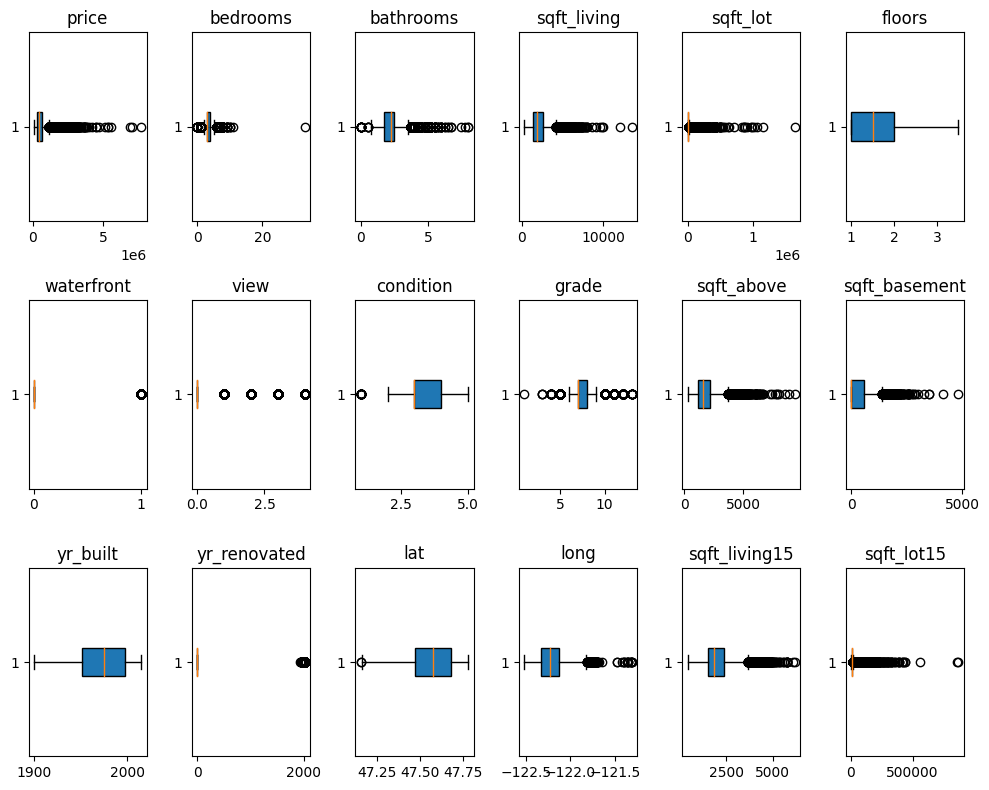

In [19]:
# Definicion de las variables a representar
columnas = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long','sqft_living15', 'sqft_lot15']

# Numero de filas y columnas necesarios para dibujar todos los boxplots
n_rows = 3
n_cols = 6

# Matriz de subgraficos
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 8))

# Boxplot de cada variable
for i, columna in enumerate(columnas):
    ax = axs[i // n_cols][i % n_cols]
    ax.boxplot(dt[columna],vert=False,patch_artist=True)
    ax.set_title(columna)

# Ajustar los espacios entre subgraficos
fig.tight_layout()

# Mostrar la figura
plt.show()

Tanto de forma analítica como de forma gráfica se detectan muchos posibles outlier. Sin embargo, no los consideraremos de esta manera ya que en realidad solo relfejan las desigualdades que existen entre las casas evaluadas. 

Tal y como se ha mencionado en el apartado de **Estadísticos relevantes** existen pocas casas con vistas a un lago, por lo que cumplir esta condición podría ser representado como un outlier. Esto mismo ocurre con muchas variables que reprentan cuestiones que pocas casas suelen cumplir.

Dado que se considera que los outliers son producidos por el significado de las variables y no por datos erróneos, se continuará el análisis con la base de datos sin modificar.

**Normalidad**

Comenzamos representando los histogramas de cada variable para hacernos una primera idea de sus posibles distribuciones.

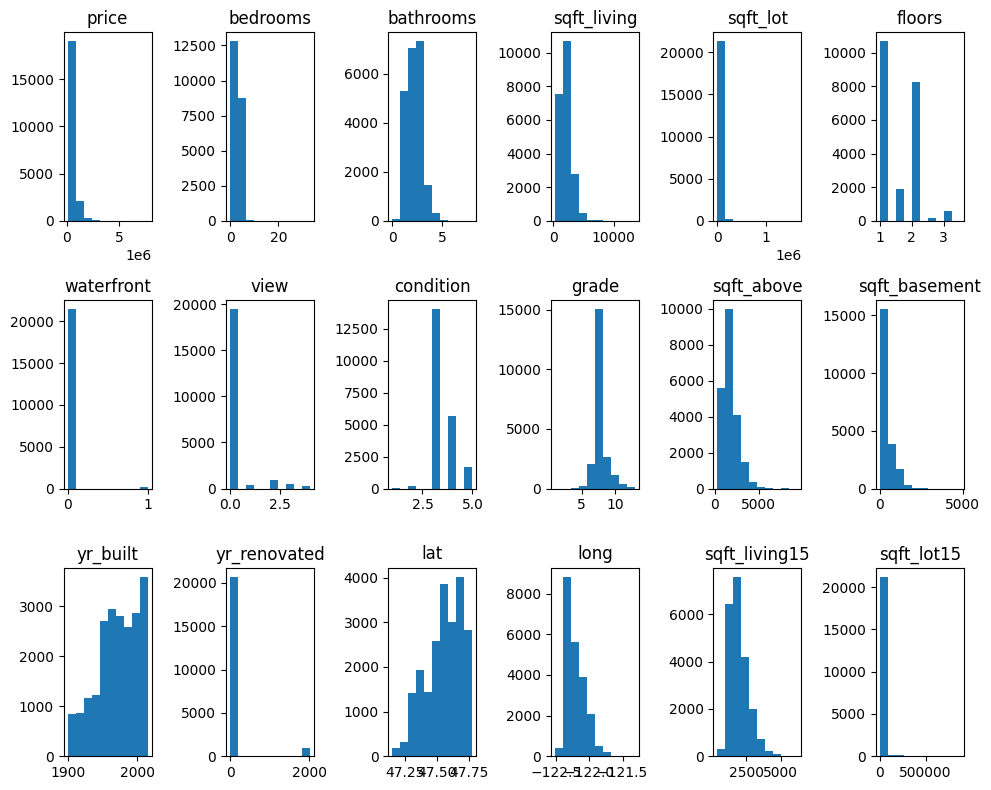

In [14]:
# Definicion de las variables a representar
columnas = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long','sqft_living15', 'sqft_lot15']

# Numero de filas y columnas necesarios para dibujar todos los subgraficos
n_rows = 3
n_cols = 6

# Matriz de subgraficos
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 8))

# Histograma de cada variable
for i, columna in enumerate(columnas):
    ax = axs[i // n_cols][i % n_cols]
    ax.hist(dt[columna])
    ax.set_title(columna)

# Ajustar los espacios entre subgraficos
fig.tight_layout()

# Mostrar la figura
plt.show()

A pesar de que ninguna variable parece normal, realizamos un test de normalidad variable a variable. Para ello emplearemos la prueba de normalidad de Mardia que comprueba la normalidad de cada una de las variables de un DataFrame. Esta prueba utiliza una medida de asimetría y una medida de curtosis para calcular una estadística de prueba. Si la estadística de prueba es significativa, entonces hay evidencia de que los datos no siguen una distribución normal.



In [15]:
stat, pvalue = mstats.normaltest(dt)
print("valor p:", pvalue)

valor p: [0.00000000e+000 0.00000000e+000 1.06804735e-309 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000]


Como todos los p-valores son menores que 0.05 (significaión por defecto) se rechaza la hipótesis de que las variables son normales una a una.

**Correlaciones**

Hacemos una análisis de correlaciones para comprobar si existe alguna variable 
redundante en nuestro data set.

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.114084,0.198372,0.713202,0.119248


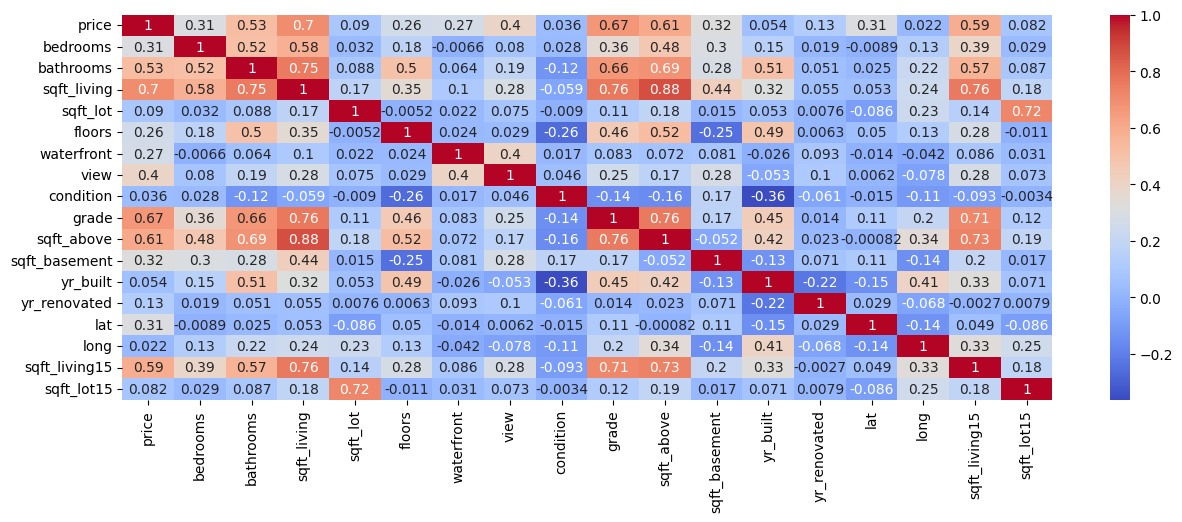

In [18]:
# Matriz de correlaciones
correlaciones = dt.corr()

# Mapa de calor de correlaciones
plt.figure(figsize=(15,5))
sns.heatmap(correlaciones,cmap="coolwarm",annot=True) 

# Matriz de correlaciones
correlaciones

## **División del dataset**

Para mayor comodidad, creamos sub-bases de datos:
*   Base de datos general: *dt*
*   Base de datos formada por las variables binarias: *dt_bin*
*   Base de datos formada por las variables categóricas: *dt_cat*
*   Base de datos formada por las variables continuas: *dt_cont*

Y separamos la variable que deseamos predecir:
*   Variable objetivo: *dt_obj*

In [ ]:
dt_bin = dt['waterfront']
dt_cat = dt.loc[:,['bedrooms','bathrooms','floors','view', 'condition', 'grade','yr_built','yr_renovated']]
dt_cont = dt.loc[:,['sqft_living','sqft_lot','sqft_above','sqft_basement','lat','long','sqft_living15','sqft_lot15',]]
dt_obj = dt['price']